In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
astropy.__version__

'5.3.4'

In [4]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [5]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [6]:
observer = astroplan.Observer.at_site('keck')

In [8]:
#10:23 - 15:17
today = Time('2024-08-29 10:23:00', scale='utc')

In [9]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)

handoff = Time('2024-08-29 10:23:00', scale='utc')

12 deg env twilight 2024-08-29 05:28:18.637
15 deg env twilight 2024-08-29 05:41:30.826
18 deg eve twilight 2024-08-29 05:54:48.610
18 deg morn twilight 2024-08-29 14:50:51.289
15 deg morn twilight 2024-08-29 15:04:09.212
12 deg morn twilight 2024-08-29 15:17:21.453


In [10]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)03:55:21.7','+09:47:18
#HZ4           = astroplan.FixedTarget(coord=SkyCoord('',unit=(u.hourangle, u.degree)),
#                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
LTT6248    = astroplan.FixedTarget(coord=SkyCoord('15:38:59.8', '-28:35:34', unit=(u.hourangle, u.degree)),
                                      name='LTT6248')#V~11.797


Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard

BD64106        =astroplan.FixedTarget(coord=SkyCoord('00:57:36.70',  '+64:51:34.92',unit=(u.hourangle, u.degree)),
                                      name='BD64106')#V~10.23, polarized
HD236633       =astroplan.FixedTarget(coord=SkyCoord('01:09:12.34',  '+60:37:40.92',unit=(u.hourangle, u.degree)),
                                      name='HD236633')#V~9.18, polarized

G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
GD319          =astroplan.FixedTarget(coord=SkyCoord('12:50:05.00',  '+55:06:00.0',unit=(u.hourangle, u.degree)),
                                      name='GD319')#V~12.32, polarized
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)

In [11]:
# stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
#         Feige110, Feige66,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020,LTT6248,Feige34]

# stds = [BD64106,HD236633]

stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, PG0205134, Feige11, Hiltner600, LTT9239,LTT1020]

### Choose Standards for the night

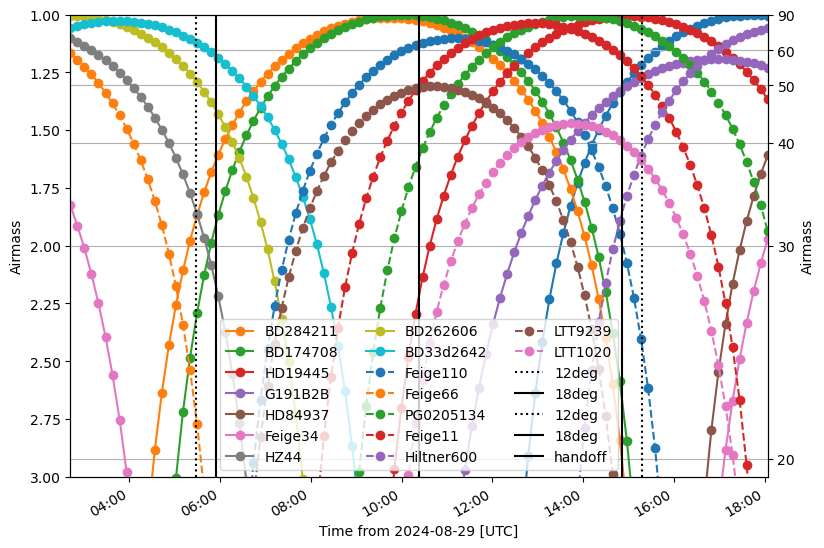

In [12]:
from astropy.utils.iers import conf
conf.auto_max_age = None
# time = today+np.linspace(0, 0.32, 100)
time = today+np.linspace(-0.32, 0.32, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle,altitude_yaxis=True)
    
plt.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(pre_twi18deg.plot_date, label='18deg', color='k')

plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')

plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [25]:
chosen_stds = [Feige110,
               HD19445]

In [15]:
sn2022mds = astroplan.FixedTarget(coord=SkyCoord('17:32:33.90', '+43:16:26.9', unit=(u.hourangle, u.degree)),
                                   name='2022mds')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu') 
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
sn2021qqu = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu')
sn2023ehl = astroplan.FixedTarget(coord=SkyCoord('20:25:10.75', '+05:15:24.3', unit=(u.hourangle, u.degree)),
                                   name='2023ehl')

sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6',  unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023dbc = astroplan.FixedTarget(coord=SkyCoord('11:11:39.21', '+55:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023dbc')
sn2023dtc = astroplan.FixedTarget(coord=SkyCoord('08:33:17.54', '-22:57:45.0', unit=(u.hourangle, u.degree)),
                                   name='2023dtc')

sn2023esp = astroplan.FixedTarget(coord=SkyCoord('06:46:53.85', '+15:35:54.2', unit=(u.hourangle, u.degree)),
                                   name='2023esp')
sn2022aagp = astroplan.FixedTarget(coord=SkyCoord('09:10:41.91' '+07:12:20.4', unit=(u.hourangle, u.degree)),
                                   name='2022aagp')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')
sn2023qea = astroplan.FixedTarget(coord=SkyCoord('18:09:04.97', '+42:34:21.7', unit=(u.hourangle, u.degree)),
                                   name='2022qea')
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')
at2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023rau = astroplan.FixedTarget(coord=SkyCoord('00:20:55.24', '-01:45:28.5', unit=(u.hourangle, u.degree)),
                                   name='2023rau')
sn2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023qov = astroplan.FixedTarget(coord=SkyCoord('21:12:02.04', '-49:15:18.1', unit=(u.hourangle, u.degree)),
                                   name='2023qov')
sn2023ubp = astroplan.FixedTarget(coord=SkyCoord('23:10:31.07', '+02:57:15.6', unit=(u.hourangle, u.degree)),
                                   name='2023ubp')
sn2023tsz = astroplan.FixedTarget(coord=SkyCoord('08:37:29.53', '-00:02:35.7', unit=(u.hourangle, u.degree)),
                                   name='2023tsz')
sn2023nlk = astroplan.FixedTarget(coord=SkyCoord('17:20:53.29', '+22:12:35.3', unit=(u.hourangle, u.degree)),
                                   name='2023nlk')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                   name='2022acko')
sn2023ngy = astroplan.FixedTarget(coord=SkyCoord('22:18:30.18', '+29:14:41.1', unit=(u.hourangle, u.degree)),
                                   name='2023ngy')
sn2023wed = astroplan.FixedTarget(coord=SkyCoord('07:24:15.50', '+19:04:52.7', unit=(u.hourangle, u.degree)),
                                   name='2023wed')
sn2022ablq = astroplan.FixedTarget(coord=SkyCoord('12:13:06.48', '+17:05:56.2', unit=(u.hourangle, u.degree)),
                                   name='2022ablq')
sn2022xxf = astroplan.FixedTarget(coord=SkyCoord('11:30:05.89', '+09:16:57.3', unit=(u.hourangle, u.degree)),
                                   name='2022xxf')
sn2023plg = astroplan.FixedTarget(coord=SkyCoord('07:17:03.16', '+24:57:31.7', unit=(u.hourangle, u.degree)),
                                   name='2023plg')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2023xje = astroplan.FixedTarget(coord=SkyCoord('05:38:52.978', '-35:55:17.07', unit=(u.hourangle, u.degree)),
                                   name='2023xje')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023xgo= astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023wdd= astroplan.FixedTarget(coord=SkyCoord('01:18:11.05', '+38:26:32.7', unit=(u.hourangle, u.degree)),
                                   name='2023wdd')

sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5', unit=(u.hourangle, u.degree)),
                                   name='2023mut')
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2023fyq = astroplan.FixedTarget(coord=SkyCoord('12:25:45.87', '+12:39:48.7', unit=(u.hourangle, u.degree)),
                                   name='2023fyq')
sn2023zcu= astroplan.FixedTarget(coord=SkyCoord('06:01:06.84', '-23:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023zcu')
sn2024gy= astroplan.FixedTarget(coord=SkyCoord('12:15:51.31', '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')
sn2024uj= astroplan.FixedTarget(coord=SkyCoord('11:07:49.04', '-20:01:34.2', unit=(u.hourangle, u.degree)),
                                   name='2024uj')
sn2023xqm= astroplan.FixedTarget(coord=SkyCoord('10:34:34.98', '-27:39:03.4', unit=(u.hourangle, u.degree)),
                                   name='2023xqm')
sn2023vyl= astroplan.FixedTarget(coord=SkyCoord('23:20:29.66', '+17:13:16.3', unit=(u.hourangle, u.degree)),
                                   name='2023vyl')
sn2023tpl= astroplan.FixedTarget(coord=SkyCoord('07:08:41.68', '+54:46:35.1', unit=(u.hourangle, u.degree)),
                                   name='2023tpl')
sn2023vog= astroplan.FixedTarget(coord=SkyCoord('09:45:09.64', '+68:35:11.9', unit=(u.hourangle, u.degree)),
                                   name='2023vog')
sn2024fa= astroplan.FixedTarget(coord=SkyCoord('02:25:01.37', '-24:47:12.6', unit=(u.hourangle, u.degree)),
                                   name='2024fa')
sn2024ws= astroplan.FixedTarget(coord=SkyCoord('08:28:46.70', '+73:45:08.7', unit=(u.hourangle, u.degree)),
                                   name='2024ws')
sn2024bch= astroplan.FixedTarget(coord=SkyCoord('10:21:50.20', '+56:55:36.1', unit=(u.hourangle, u.degree)),
                                   name='2024bch')
sn2023wrk= astroplan.FixedTarget(coord=SkyCoord('11:28:39.17', '+58:33:12.7', unit=(u.hourangle, u.degree)),
                                   name='2023wrk')
sn2024gy= astroplan.FixedTarget(coord=SkyCoord('12:15:51.31', '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')

sn2024apt= astroplan.FixedTarget(coord=SkyCoord('10:25:36.87', '-02:12:40.0', unit=(u.hourangle, u.degree)),
                                   name='2024apt')

sn2024drv = astroplan.FixedTarget(coord=SkyCoord('13:38:27.85', '+33:06:55.7', unit=(u.hourangle, u.degree)),
                                   name='2024drv')
sn2024byg = astroplan.FixedTarget(coord=SkyCoord('12:51:53.84', '-04:34:24.7', unit=(u.hourangle, u.degree)),
                                   name='2024byg')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61', '+18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024cdi = astroplan.FixedTarget(coord=SkyCoord('08:27:08.00', '+22:50:27.8', unit=(u.hourangle, u.degree)),
                                   name='2024cdi')
sn2024btj = astroplan.FixedTarget(coord=SkyCoord('11:39:14.44', '+56:15:38.6', unit=(u.hourangle, u.degree)),
                                   name='2024btj')
sn2023ijd = astroplan.FixedTarget(coord=SkyCoord('12:36:32.48', '+11:13:19.7', unit=(u.hourangle, u.degree)),
                                   name='2023ijd')
sn2023aaby = astroplan.FixedTarget(coord=SkyCoord('08:40:45.31', '-04:07:01.2', unit=(u.hourangle, u.degree)),
                                   name='2023aaby')
sn2023vbg = astroplan.FixedTarget(coord=SkyCoord('07:43:43.78', '+34:22:30.1', unit=(u.hourangle, u.degree)),
                                   name='2023vbg')
sn2024ehs = astroplan.FixedTarget(coord=SkyCoord('10:53:00.52', '+17:34:21.5', unit=(u.hourangle, u.degree)),
                                   name='2024ehs')

sn2024ahr = astroplan.FixedTarget(coord=SkyCoord('14:21:59.14', '-12:30:21.0', unit=(u.hourangle, u.degree)),
                                   name='2024ahr')
sn2024atk = astroplan.FixedTarget(coord=SkyCoord('13:18:31.13', '-14:36:39.1', unit=(u.hourangle, u.degree)),
                                   name='2024atk')

sn2024faq = astroplan.FixedTarget(coord=SkyCoord('15:44:29.76','+40:21:23.6', unit=(u.hourangle, u.degree)),
                                   name='2024faq')
sn2024inv = astroplan.FixedTarget(coord=SkyCoord('11:06:32.16', '+11:22:42.6', unit=(u.hourangle, u.degree)),
                                   name='2024inv')
sn2024iss = astroplan.FixedTarget(coord=SkyCoord('12:59:06.14', '+28:48:42.5', unit=(u.hourangle, u.degree)),
                                   name='2024iss')
sn2024ggi = astroplan.FixedTarget(coord=SkyCoord('11:18:22.09', '-32:50:15.3', unit=(u.hourangle, u.degree)),
                                   name='2024ggi')
sn2024amf = astroplan.FixedTarget(coord=SkyCoord('15:34:23.34', '-00:08:08.0', unit=(u.hourangle, u.degree)),
                                   name='2024amf')
sn2024gqd = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42', '+01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024gqd')

sn2023ldh = astroplan.FixedTarget(coord=SkyCoord('15:09:09.60', '+52:31:59.8', unit=(u.hourangle, u.degree)),
                                   name='2023ldh')
sn2023xbg = astroplan.FixedTarget(coord=SkyCoord('20:45:47.39','-29:31:09.7', unit=(u.hourangle, u.degree)),
                                   name='2023xbg')
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32','-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023vyl = astroplan.FixedTarget(coord=SkyCoord('23:20:29.66','+17:13:16.3', unit=(u.hourangle, u.degree)),
                                   name='2023vyl')
sn2024dde = astroplan.FixedTarget(coord=SkyCoord('14:49:54.39', '+13:54:02.5', unit=(u.hourangle, u.degree)),
                                   name='2024dde')
sn2024ahv = astroplan.FixedTarget(coord=SkyCoord('16:18:46.32', '+07:24:44.8', unit=(u.hourangle, u.degree)),
                                   name='2024ahv')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61', '+18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024pxl = astroplan.FixedTarget(coord=SkyCoord('17:32:27.35','+07:03:44.8',unit=(u.hourangle,u.degree)),
                                   name='2024pxl')
sn2023yoo = astroplan.FixedTarget(coord=SkyCoord('22:01:03.14','-13:16:29.0',unit=(u.hourangle,u.degree)),
                                   name='2023yoo')
sn2024mpq = astroplan.FixedTarget(coord=SkyCoord('22:30:41.08','+39:17:30.2',unit=(u.hourangle,u.degree)),
                                   name='2024mpq')
sn2023ref = astroplan.FixedTarget(coord=SkyCoord('22:30:41.08','+39:17:30.2',unit=(u.hourangle,u.degree)),
                                   name='2023ref')
sn2023rbk = astroplan.FixedTarget(coord=SkyCoord('03:15:20.60','+41:36:53.6',unit=(u.hourangle,u.degree)),
                                   name='2023rbk')
sn2024dco = astroplan.FixedTarget(coord=SkyCoord('03:04:19.54','-11:54:13.6',unit=(u.hourangle,u.degree)),
                                   name='2024dco')
sn2024any = astroplan.FixedTarget(coord=SkyCoord('03:08:57.83','-02:56:45.9',unit=(u.hourangle,u.degree)),
                                   name='2024any')
sn2023rve = astroplan.FixedTarget(coord=SkyCoord('02:46:18.13','-30:14:22.2',unit=(u.hourangle,u.degree)),
                                   name='2023rve')
sn2023ucy = astroplan.FixedTarget(coord=SkyCoord('19:01:41.99','+40:45:05.9',unit=(u.hourangle,u.degree)),
                                   name='2023ucy')

sn2024ifo = astroplan.FixedTarget(coord=SkyCoord('15:29:34.87','+11:17:20.6',unit=(u.hourangle,u.degree)),
                                   name='2024ifo')
sn2017eaw = astroplan.FixedTarget(coord=SkyCoord('20:34:44.24','+60:11:35.9',unit=(u.hourangle,u.degree)),
                                   name='2017eaw')
sn2024jga = astroplan.FixedTarget(coord=SkyCoord('23:36:06.46','+24:03:17.6',unit=(u.hourangle,u.degree)),
                                   name='2024jga')
sn2023pfz = astroplan.FixedTarget(coord=SkyCoord('02:25:05.90','+22:13:22.4',unit=(u.hourangle,u.degree)),
                                   name='2023pfz')
sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5',unit=(u.hourangle,u.degree)),
                                   name='2023mut')

In [16]:
targets = [
    sn2024cld,
    sn2023ldh,
#     sn2024gqd,
    sn2024pxl,
    sn2023yoo,
    sn2023vyl,
    sn2024mpq,
    sn2023ref,
    sn2023gft,
    sn2023ngy,
    sn2023rbk,
#     sn2024dco,
#     sn2024any,
    sn2023rve,
#    sn2023ucy,
    sn2024drv,
    sn2024gqd,
    sn2024ifo,
#     sn2017eaw,
    sn2024jga,
    sn2023pfz,
    sn2023mut
]

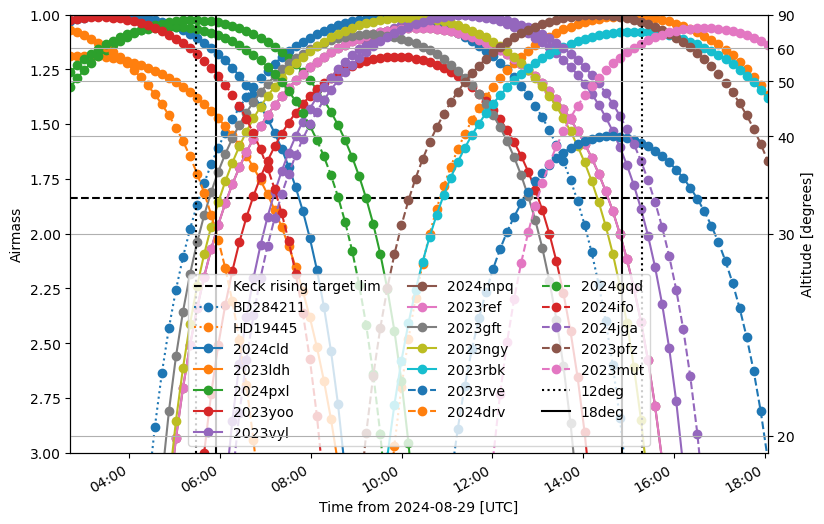

In [17]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
time = today+np.linspace(-0.32, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [18]:
sn2024gqd = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42', '+01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024gqd')
sn2023ldh = astroplan.FixedTarget(coord=SkyCoord('15:09:09.60', '+52:31:59.8', unit=(u.hourangle, u.degree)),
                                   name='2023ldh')
sn2023xbg = astroplan.FixedTarget(coord=SkyCoord('20:45:47.39','-29:31:09.7', unit=(u.hourangle, u.degree)),
                                   name='2023xbg')
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32','-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023vyl = astroplan.FixedTarget(coord=SkyCoord('23:20:29.66','+17:13:16.3', unit=(u.hourangle, u.degree)),
                                   name='2023vyl')
sn2024dde = astroplan.FixedTarget(coord=SkyCoord('14:49:54.39', '+13:54:02.5', unit=(u.hourangle, u.degree)),
                                   name='2024dde')
sn2024ahv = astroplan.FixedTarget(coord=SkyCoord('16:18:46.32', '+07:24:44.8', unit=(u.hourangle, u.degree)),
                                   name='2024ahv')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61', '+18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024pxl = astroplan.FixedTarget(coord=SkyCoord('17:32:27.35','+07:03:44.8',unit=(u.hourangle,u.degree)),
                                   name='2024pxl')
sn2023yoo = astroplan.FixedTarget(coord=SkyCoord('22:01:03.14','-13:16:29.0',unit=(u.hourangle,u.degree)),
                                   name='2023yoo')
sn2024mpq = astroplan.FixedTarget(coord=SkyCoord('22:30:41.08','+39:17:30.2',unit=(u.hourangle,u.degree)),
                                   name='2024mpq')
sn2023ref = astroplan.FixedTarget(coord=SkyCoord('22:30:41.08','+39:17:30.2',unit=(u.hourangle,u.degree)),
                                   name='2023ref')
sn2023rbk = astroplan.FixedTarget(coord=SkyCoord('03:15:20.60','+41:36:53.6',unit=(u.hourangle,u.degree)),
                                   name='2023rbk')
sn2024dco = astroplan.FixedTarget(coord=SkyCoord('03:04:19.54','-11:54:13.6',unit=(u.hourangle,u.degree)),
                                   name='2024dco')
sn2024any = astroplan.FixedTarget(coord=SkyCoord('03:08:57.83','-02:56:45.9',unit=(u.hourangle,u.degree)),
                                   name='2024any')
sn2023rve = astroplan.FixedTarget(coord=SkyCoord('02:46:18.13','-30:14:22.2',unit=(u.hourangle,u.degree)),
                                   name='2023rve')
sn2023ucy = astroplan.FixedTarget(coord=SkyCoord('19:01:41.99','+40:45:05.9',unit=(u.hourangle,u.degree)),
                                   name='2023ucy')
sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5',unit=(u.hourangle,u.degree)),
                                   name='2023mut')

In [17]:
standard_reference = ''' Copied from above
gd71         05:52:27.51 +15:53:16.6 ??   ??   # 
BD174708     22:11:31.37 +18:05:34.2 9.2  1x10 # red standard
HD19445      03:08:25.86 +26:20:05.7 7.8  1x10 # red standard
HD84937      09:48:56.09 +13:44:39.3 8.3  1x10 # red standard
BD262606     14:49:02.35 +25:42:09.1 9.7  1x20 # red standard
Feige66      12:37:23.6  +25:04:00   10.5 1x20 # 
PG0205134    02:08:03.44 +13:36:30.9 14.9 ??   # 
Feige11      01:04:21.6  +04:13:37   12.1 1x60 # 
Hiltner600   06:45:13.40 +02:08:14.1 10.5 ??   # 
LTT9239      22:52:40.88 -20:35:26.3 ??   ??   # 
LTT1020      01:54:49.7  -27:28:29   11.5 ??   # 
LTT6248      15:38:59.8  -28:35:34   11.8 ??   # 
Feige34      10:39:36.74 +43:06:09.3 11.3 1x60 # blue standard
BD284211     21:51:11.02 +28:51:50.4 10.7 1x30 # blue standard
Feige110     23:19:58.39 -05:09:55.8 11.8 1x60 #
HZ44         13:23:35.26 +36:07:59.5 11.7 1x60 # blue standard
BD64106      00:57:36.70 +64:51:34.9 10.2 ??   # polarized
HD236633     01:09:12.34 +60:37:40.9 9.2  ??   # polarized
G191B2B      05:05:30.60 +52:49:54.0 11.9 1x60 # blue standard
GD319        12:50:05.00 +55:06:00.0 12.3 ??   # polarized
BD33d2642    15:51:59.86 +32:56:54.8 10.8 1x30 #
'''

In [125]:
# Plan A: H alpha detected from first 22wsp trace
tab = """Feige110     23:19:58.39 -05:09:55.8 11.8 1x60
2023gft     21:26:01.32 -03:47:53.6 21   2x900
2023ref     22:30:41.08 +39:17:30.2 22   3x900
2023vyl     23:20:29.66 +17:13:16.3 21.5 3x900
2024fa      02:25:01.37 -24:47:12.6 20   2x900 
2024any     03:08:57.83 -02:56:45.9 19   1x600
2023mut     04:48:34.34 +00:14:47.5 21.5 3x900
HD19445     03:08:25.86 +26:20:05.7 7.8  1x10
end     00:00:00     -90:00:00.  99 1x1 """

# # Plan B
# tab = """BD33d2642    15:51:59.86 +32:56:54.8 10.8 1x30
# 2024ifo     15:29:34.87 +11:17:20.6 19.3 2x600
# 2023nlk     17:20:53.29 +22:12:35.3 21   2x900
# 2024pxl     17:32:27.35 +07:03:44.8 15.9 2x100
# 2023ucy     19:01:41.99 +40:45:05.9 21   2x900
# 2023gft     21:26:01.32 -03:47:53.6 21   2x900
# 2022wsp     23:00:03.53 +15:58:42.6 23   1x1200
# 2023ref     22:30:41.08 +39:17:30.2 22   3x900
# 2023vyl     23:20:29.66 +17:13:16.3 21.5 3x900
# 2023rbk     03:15:20.60 +41:36:53.6 22   3x900
# 2024fa      02:25:01.37 -24:47:12.6 20   2x900
# HD19445     03:08:25.86 +26:20:05.7 7.8  1x10
# end     00:00:00     -90:00:00.  99 1x1 """

# List from Dave:
# SN2022acko 03:19:38.99 -19:23:42.68
# SN2022wsp  23:00:03.53 +15:58:42.60
# SN2021yja  03:24:21.18 -21:33:56.20
# SN2017gmr  02:35:30.18 -09:21:15.08

In [126]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [127]:
# tbdata

In [128]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [129]:
tbdata['start'] = obs_start[:-1]

In [130]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
Feige110,23:19:58.39,-05:09:55.8,11.8,1x60,1.0,60.0,2024-08-29 10:23:00.000
2023gft,21:26:01.32,-03:47:53.6,21,2x900,2.0,900.0,2024-08-29 10:29:00.000
2023ref,22:30:41.08,+39:17:30.2,22,3x900,3.0,900.0,2024-08-29 11:07:15.000
2023vyl,23:20:29.66,+17:13:16.3,21.5,3x900,3.0,900.0,2024-08-29 12:03:45.000
2024fa,02:25:01.37,-24:47:12.6,20,2x900,2.0,900.0,2024-08-29 13:00:15.000
2024any,03:08:57.83,-02:56:45.9,19,1x600,1.0,600.0,2024-08-29 13:38:30.000
2023mut,04:48:34.34,+00:14:47.5,21.5,3x900,3.0,900.0,2024-08-29 13:53:30.000
HD19445,03:08:25.86,+26:20:05.7,7.8,1x10,1.0,10.0,2024-08-29 14:50:00.000
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2024-08-29 14:55:10.000


In [131]:
15+1250*2/60.+(195)/60.

59.916666666666664

In [132]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

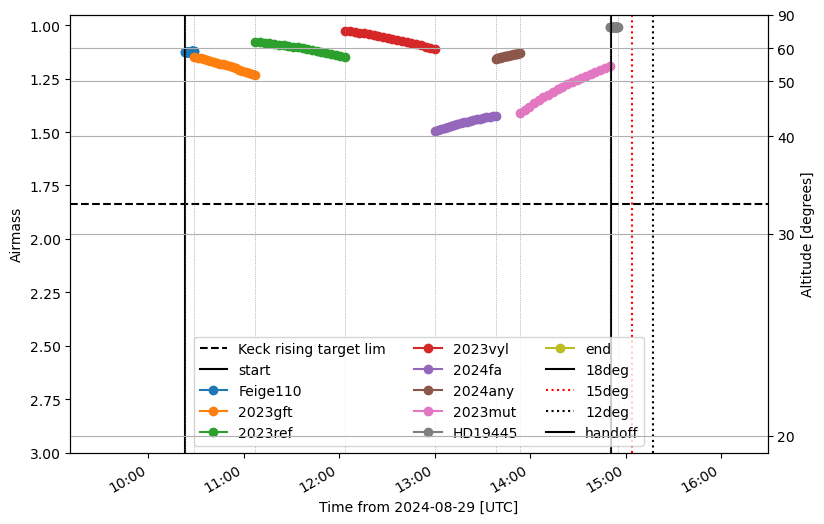

In [133]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
#ax.axhline(1/np.cos(((90-40)*u.degree).to(u.radian)), color='k', ls='--', label='Shane target lim')
#ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='r', ls='--', label='Keck rising target lim')
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_keck_lris_24_08_28.pdf')

In [134]:
handoff

<Time object: scale='utc' format='iso' value=2024-08-29 10:23:00.000>

# Backup

In [135]:
sn2020jgl = astroplan.FixedTarget(coord=SkyCoord('09:28:58.43', '-14:48:19.8', unit=(u.hourangle, u.degree)),
                                  name='2020jgl')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
sn2020tkx = astroplan.FixedTarget(coord=SkyCoord('18:40:09.00', '+34:06:59.5', unit=(u.hourangle, u.degree)),
                                  name='2020tkx')
sn2020jfo = astroplan.FixedTarget(coord=SkyCoord('12:21:50.48', '+04:28:54.1', unit=(u.hourangle, u.degree)),
                                  name='2020jfo')
sn2020hvf = astroplan.FixedTarget(coord=SkyCoord('11:21:26.45', '+03:00:52.8', unit=(u.hourangle, u.degree)),
                                  name='2020hvf')
sn2019xdf = astroplan.FixedTarget(coord=SkyCoord('09:27:51.81', '+68:24:42.4', unit=(u.hourangle, u.degree)),
                                  name='2019xdf')
sn2019eez = astroplan.FixedTarget(coord=SkyCoord('06:16:22.26', '-21:21:35.7', unit=(u.hourangle, u.degree)),
                                  name='2019eez')
sn2015bh = astroplan.FixedTarget(coord=SkyCoord('09:09:35.09', '+33:07:21.4', unit=(u.hourangle, u.degree)),
                                  name='2015bh')
sn2020qmj = astroplan.FixedTarget(coord=SkyCoord('00:44:06.01', '+05:15:35.9', unit=(u.hourangle, u.degree)),
                                  name='2020qmj')
sn2019ust = astroplan.FixedTarget(coord=SkyCoord('00:54:22.42', '+31:40:12.6', unit=(u.hourangle, u.degree)),
                                  name='2019ust')
sn2020vg = astroplan.FixedTarget(coord=SkyCoord('11:48:54.44', '-04:40:53.9', unit=(u.hourangle, u.degree)),
                                  name='2020vg')

In [136]:
tab = """2024gqd     17:04:32.42 +01:20:42.7 21 2x900
2023xbg     20:45:47.39 -29:31:09.7 20.5 2x900
2023yoo     22:01:03.14 -13:16:29.0 21   2x900
2023ngy     22:18:30.18 +29:14:41.1 22   3x900
buffer      00:00:00    +00:00:00   00   4x1200
2023pfz     02:25:05.90 +22:13:22.4 21.5 3x900
2024dco     03:04:19.54 -11:54:13.6 21   2x900
2024any     03:08:57.83 -02:56:45.9 19   1x600
end     00:00:00     -90:00:00.  99 1x1 """

# Low RA/DEC still, maybe try next night
# 2023rve     02:46:18.13 -30:14:22.2 21  2x900

# Observed 20240731:
# 2024gqd     17:04:32.42 +01:20:42.7 21 2x900
# 2024pxl     17:32:27.35 +07:03:44.8 16.2 2x100
# 2017eaw     20:34:44.24 +60:11:35.9 23   4x1200
# 2024any     03:08:57.83 -02:56:45.9 19   2x600
# 2024dco     03:04:19.54 -11:54:13.6 21   2x900

# Previously followd, too low RA
# 2024drv     13:38:27.85 +33:06:55.7 19  1x600
# 2024dde     14:49:54.39 +13:54:02.5 18.5 2x300
# 2023ldh     15:09:09.60 +52:31:59.8 21  1x1200
# 2024ifo     15:29:34.87 +11:17:20.6 19 1x600
# 2024cld     15:50:21.61 +18:56:21.1 18  1x300

In [137]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [138]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [139]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
2024gqd,17:04:32.42,+01:20:42.7,21,2x900,2.0,900.0
2023xbg,20:45:47.39,-29:31:09.7,20.5,2x900,2.0,900.0
2023yoo,22:01:03.14,-13:16:29.0,21,2x900,2.0,900.0
2023ngy,22:18:30.18,+29:14:41.1,22,3x900,3.0,900.0
buffer,00:00:00,+00:00:00,00,4x1200,4.0,1200.0
2023pfz,02:25:05.90,+22:13:22.4,21.5,3x900,3.0,900.0
2024dco,03:04:19.54,-11:54:13.6,21,2x900,2.0,900.0
2024any,03:08:57.83,-02:56:45.9,19,1x600,1.0,600.0
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0


In [140]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [141]:
tbdata['start'] = obs_start[:-1]

In [142]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
2024gqd,17:04:32.42,+01:20:42.7,21,2x900,2.0,900.0,2024-08-29 10:23:00.000
2023xbg,20:45:47.39,-29:31:09.7,20.5,2x900,2.0,900.0,2024-08-29 11:01:15.000
2023yoo,22:01:03.14,-13:16:29.0,21,2x900,2.0,900.0,2024-08-29 11:39:30.000
2023ngy,22:18:30.18,+29:14:41.1,22,3x900,3.0,900.0,2024-08-29 12:17:45.000
buffer,00:00:00,+00:00:00,00,4x1200,4.0,1200.0,2024-08-29 13:14:15.000
2023pfz,02:25:05.90,+22:13:22.4,21.5,3x900,3.0,900.0,2024-08-29 14:49:00.000
2024dco,03:04:19.54,-11:54:13.6,21,2x900,2.0,900.0,2024-08-29 15:45:30.000
2024any,03:08:57.83,-02:56:45.9,19,1x600,1.0,600.0,2024-08-29 16:23:45.000
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2024-08-29 16:38:45.000


In [143]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

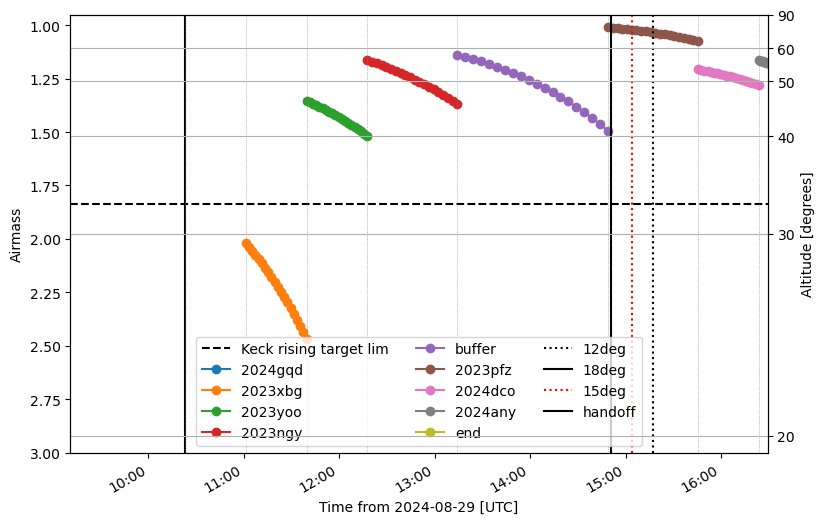

In [144]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')